# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [95]:
heroes_df = pd.read_csv('heroes_information.csv', index_col=0)
powers_df = pd.read_csv('super_hero_powers.csv')

display(heroes_df.head(), powers_df.head())

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [96]:
### already did this by setting that first col to be the index when reading in the file (index_col=0)
## if didn't do that earlier, could do the following:

# heroes_df.drop('Unnamed: 0', axis=1)#, inplace=True)
### this code tells it to drop the column (axis=1) called 'Unnamed: 0' and inplace=True makes the change
##### directly in the original heroes_df instead of saving the altered copy as something else

## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [97]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


In [98]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [99]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [100]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Brother Voodoo,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [101]:
# Can create a function to check and print out useful info for a given df as a df
def check_df(df):
    info = {'dtypes':df.dtypes, # what are the data types of the cols
           'null values':df.isna().sum(), # how many null vals in ea col
            '% null': np.round((df.isna().sum()/len(df))*100,2), # % of col vals that are NaN
           'nunique':df.nunique(),} # num of unique vals in a col
    return pd.DataFrame(info).head(len(df.columns)) # convert the info dict into a df and display it

In [102]:
check_df(heroes_df)

,dtypes,null values,% null,nunique
name,object,0,0.00,715
Gender,object,0,0.00,3
Eye color,object,0,0.00,23
Race,object,0,0.00,62
Hair color,object,0,0.00,30
Height,float64,0,0.00,54
Publisher,object,15,2.04,24
Skin color,object,0,0.00,17
Alignment,object,0,0.00,4
Weight,float64,2,0.27,135


In [103]:
check_df(powers_df)

,dtypes,null values,% null,nunique
hero_names,object,0,0.0,667
Agility,bool,0,0.0,2
Accelerated Healing,bool,0,0.0,2
Lantern Power Ring,bool,0,0.0,2
Dimensional Awareness,bool,0,0.0,2
...,...,...,...,...
Phoenix Force,bool,0,0.0,2
Molecular Dissipation,bool,0,0.0,2
Vision - Cryo,bool,0,0.0,2
Omnipresent,bool,0,0.0,2


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [104]:
# heroes_df only has 2 cols with null values: 
## Publisher has 15 null values (2.04%) and weight has 2 null values (0.27%)
## HOWEVER, both height and weight cols have minimum values of -99, so that's probably a placeholder value:

# 217 of the 734 Height values are this placeholder value -- that's 29.56%
display(heroes_df['Height'].value_counts().head())

# 237 of the 734 Height values are this placeholder value -- that's 32.28%
display(heroes_df['Weight'].value_counts().head())

# these placeholder values may be non-randomly distributed among categories like Race, 
## so right now just going to leave them as is

-99.0     217
 183.0     59
 188.0     51
 178.0     39
 180.0     38
Name: Height, dtype: int64

-99.0    237
 79.0     23
 54.0     23
 81.0     22
 90.0     19
Name: Weight, dtype: int64

In [105]:
# Replace the null values in the Weight col with the median
heroes_df['Weight'].fillna(heroes_df['Weight'].median(), inplace=True)
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [106]:
# check for other instances of placeholders in heroes_df, specifically object data types

In [107]:
# output of the following shows which columns hold object data type
heroes_df.dtypes.loc[heroes_df.dtypes == 'object'].index # index is basic object storing axis labels 
                                                         # for all pandas objects, stores as ndarray

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Publisher',
       'Skin color', 'Alignment'],
      dtype='object')

In [108]:
# the following indexes the column names of columns with object data type and stores them as ndarray assigned to
str_cols = heroes_df.select_dtypes('object').columns
str_cols

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Publisher',
       'Skin color', 'Alignment'],
      dtype='object')

In [109]:
for col in str_cols:
    display(heroes_df[col].value_counts(normalize=True, dropna=False))
# appear to be some duplicate entries given that some hero names show up more frequently than others

# placeholder value for Gender is '-', accounts for 3.95% of records
# placeholder value for Eye color is also '-', accounts for 23.43% of records
# same placeholder in Race, accounts for 41.42% of records (most freq value for Race is '-')
# same placeholder value for Hair color, accounts for 23.43% (most freq Hair color is '-')
# same placeholder value for Skin color, accounts for 90.19% (most freq Skin color is '-')
# same placeholder value for Alignment, accounts for only 0.95%

Goliath           0.004087
Spider-Man        0.004087
Firestorm         0.002725
Captain Marvel    0.002725
Blizzard          0.002725
                    ...   
Cogliostro        0.001362
X-Man             0.001362
Mister Knife      0.001362
Winter Soldier    0.001362
Batgirl IV        0.001362
Name: name, Length: 715, dtype: float64

Male      0.688011
Female    0.272480
-         0.039510
Name: Gender, dtype: float64

blue                       0.306540
-                          0.234332
brown                      0.171662
green                      0.099455
red                        0.062670
black                      0.031335
yellow                     0.025886
white                      0.023161
grey                       0.008174
hazel                      0.008174
purple                     0.005450
gold                       0.004087
yellow (without irises)    0.002725
violet                     0.002725
amber                      0.002725
yellow / blue              0.001362
blue / white               0.001362
silver                     0.001362
bown                       0.001362
yellow / red               0.001362
green / blue               0.001362
indigo                     0.001362
white / red                0.001362
Name: Eye color, dtype: float64

-                0.414169
Human            0.283379
Mutant           0.085831
God / Eternal    0.019074
Cyborg           0.014986
                   ...   
Ungaran          0.001362
Talokite         0.001362
Spartoi          0.001362
Neyaphem         0.001362
Czarnian         0.001362
Name: Race, Length: 62, dtype: float64

-                   0.234332
Black               0.215259
Blond               0.134877
Brown               0.117166
No Hair             0.102180
Red                 0.069482
White               0.031335
Auburn              0.017711
Green               0.010899
Strawberry Blond    0.009537
Purple              0.006812
Grey                0.006812
Silver              0.005450
Brown / White       0.005450
blond               0.004087
black               0.004087
Blue                0.004087
Orange              0.002725
Yellow              0.002725
Pink                0.001362
Gold                0.001362
Orange / White      0.001362
Indigo              0.001362
Magenta             0.001362
Brownn              0.001362
Red / Orange        0.001362
Red / White         0.001362
Black / Blue        0.001362
Red / Grey          0.001362
Brown / Black       0.001362
Name: Hair color, dtype: float64

Marvel Comics        0.528610
DC Comics            0.292916
NBC - Heroes         0.025886
Dark Horse Comics    0.024523
NaN                  0.020436
Image Comics         0.019074
George Lucas         0.019074
HarperCollins        0.008174
Star Trek            0.008174
SyFy                 0.006812
Team Epic TV         0.006812
Icon Comics          0.005450
ABC Studios          0.005450
IDW Publishing       0.005450
Shueisha             0.005450
Wildstorm            0.004087
Sony Pictures        0.002725
South Park           0.001362
Hanna-Barbera        0.001362
Universal Studios    0.001362
Microsoft            0.001362
J. K. Rowling        0.001362
Rebellion            0.001362
Titan Books          0.001362
J. R. R. Tolkien     0.001362
Name: Publisher, dtype: float64

-                 0.901907
green             0.028610
blue              0.012262
red               0.012262
white             0.009537
silver            0.006812
grey              0.006812
purple            0.004087
gold              0.004087
pink              0.002725
yellow            0.002725
black             0.001362
orange            0.001362
gray              0.001362
blue-white        0.001362
red / black       0.001362
orange / white    0.001362
Name: Skin color, dtype: float64

good       0.675749
bad        0.282016
neutral    0.032698
-          0.009537
Name: Alignment, dtype: float64

In [110]:
# can just replace placeholder in Alignment with mode
## first change the placeholder to a null value
to_replace = {'-': np.nan}
heroes_df['Alignment'].replace(to_replace, inplace=True)
alignment_mode = heroes_df['Alignment'].mode()
heroes_df['Alignment'] = heroes_df['Alignment'].fillna(alignment_mode) # why is this not working???????
heroes_df['Alignment'].value_counts(normalize=True, dropna=False)

good       0.675749
bad        0.282016
neutral    0.032698
NaN        0.009537
Name: Alignment, dtype: float64

In [111]:
# replace placeholders with modes of each col
## first change the placeholder to a null value
for col in str_cols: 
    heroes_df[col] = heroes_df[col].replace(to_replace)
heroes_df.isna().sum()

name            0
Gender         29
Eye color     172
Race          304
Hair color    172
Height          0
Publisher      15
Skin color    662
Alignment       7
Weight          0
dtype: int64

In [112]:
# now replace the null values with the mode from each col
for col in str_cols:
    val_counts = heroes_df[col].value_counts()
    top_class = val_counts.index[0]
    heroes_df[col] = heroes_df[col].fillna(top_class)

In [113]:
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [114]:
powers_df.isna().any() # returns a boolean value for each col, but still too many cols to look at at once so

hero_names               False
Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
                         ...  
Phoenix Force            False
Molecular Dissipation    False
Vision - Cryo            False
Omnipresent              False
Omniscient               False
Length: 168, dtype: bool

In [115]:
powers_df.isna().any().any() 
# returns a boolean value checking is any col returned False, indicating a null value somewhere
# output is false, so there are no null values in powers_df

False

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [119]:
# need to remove the duplicate entries from the heroes_df
print(heroes_df.duplicated().any()) # output of True indicates there are duplicate rows
powers_df.duplicated().any() # output of False indicates there aren't any duplicate rows

True


False

In [120]:
heroes_df.drop_duplicates(inplace=True)
heroes_df.duplicated().any() # no more duplicate rows in heroes_df

False

In [121]:
display(heroes_df.head(), powers_df.head())

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,green,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,green,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,green,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [122]:
# set the name col of the heroes_df as its index 
## (joins are performed based on df keys, so setting this to name will make it easier)
heroes_df.set_index('name', inplace=True)
heroes_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,green,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,green,bad,441.0
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,green,bad,-99.0


In [123]:
# rename the hero_names col of the powers_df and set that as the index
## (joins are performed based on df keys, so setting this to name will make it easier)
powers_df.rename(columns={'hero_names': 'name'}, inplace=True)
powers_df.set_index('name', inplace=True)
powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [124]:
display(heroes_df.shape, powers_df.shape)
# heroes_df has 732 different heroes in it, powers has only 667
## When performing a join, don't want to include a whole bunch of null values where powers don't have
### name keys to match up with heroes

(732, 9)

(667, 167)

In [125]:
# perform an inner join so only rows with keys that match across both DataFrames will be returned
heroes_powers_df = heroes_df.join(powers_df, how='inner')
heroes_powers_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,green,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,green,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,green,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

<AxesSubplot:xlabel='Height', ylabel='Weight'>

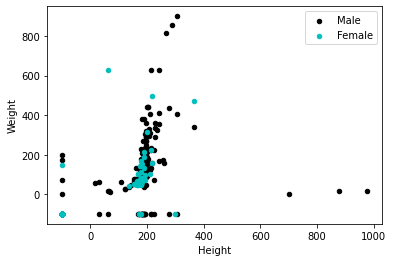

In [126]:
male_heroes_df = heroes_powers_df[heroes_powers_df['Gender'] == 'Male']
female_heroes_df = heroes_powers_df[heroes_powers_df['Gender'] == 'Female']

ax = male_heroes_df.plot.scatter(x='Height', y='Weight', c='k', label='Male')
female_heroes_df.plot.scatter(x='Height', y='Weight', c='c', label='Female', ax=ax)

In [147]:
def show_distplot(dataframe, gender, column_name):
    ax = sns.distplot(dataframe[column_name])
    ax.set_title('Distribution of {} for {} Heroes'.format(column_name, gender))
    ax.set_xlabel(column_name)
    ax.axvline(dataframe[column_name].mean(), c='r', label='mean {}'.format(column_name))
    ax.axvline(dataframe[column_name].median(), c='g', label='median {}'.format(column_name))
    plt.legend()
    plt.show()
    
    

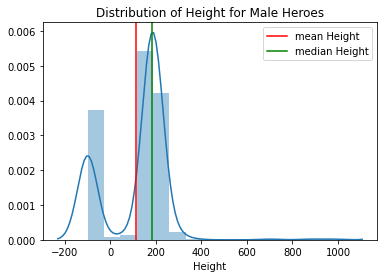

Mean height for male heroes: 114.18
Median height for male heroes: 183.0


In [148]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')
print('Mean height for male heroes: {}'.format(round(male_heroes_df['Height'].mean(), 2)))
print('Median height for male heroes: {}'.format(male_heroes_df['Height'].median()))

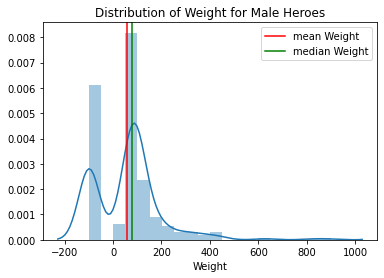

Mean weight for male heroes: 58.05
Median weight for male heroes: 79.0


In [149]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')
print('Mean weight for male heroes: {}'.format(round(male_heroes_df['Weight'].mean(), 2)))
print('Median weight for male heroes: {}'.format(male_heroes_df['Weight'].median()))

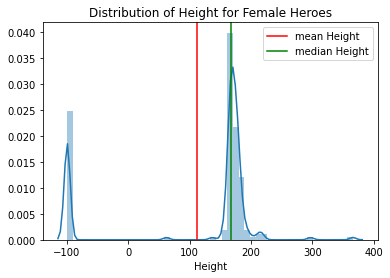

Mean height for female heroes: 111.69
Median height for female heroes: 168.0


In [150]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')
print('Mean height for female heroes: {}'.format(round(female_heroes_df['Height'].mean(), 2)))
print('Median height for female heroes: {}'.format(female_heroes_df['Height'].median()))

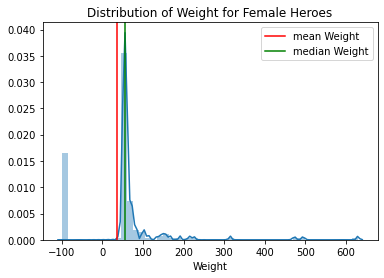

Mean weight for female heroes: 36.65
Median weight for female heroes: 54.5


In [151]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')
print('Mean weight for female heroes: {}'.format(round(female_heroes_df['Weight'].mean(), 2)))
print('Median weight for female heroes: {}'.format(female_heroes_df['Weight'].median()))

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [153]:
display(heroes_powers_df.head())
heroes_powers_df.shape

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,green,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,green,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,green,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False


(660, 176)

In [158]:
# What are the 5 most common powers overall?
power_cols = heroes_powers_df.columns[9:]
power_cols

Index(['Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight', 'Danger Sense',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=167)

In [185]:
power_dict = {}
for col in power_cols:
    power_dict[col] = heroes_powers_df[col].sum()
sorted(power_dict.items(), key=lambda x: x[1], reverse=True)[:5]

[('Super Strength', 362),
 ('Stamina', 294),
 ('Durability', 262),
 ('Super Speed', 251),
 ('Agility', 244)]

In [189]:
# What are the 5 most common powers in the Marvel Universe?
marvel_df = heroes_powers_df[heroes_powers_df['Publisher'] == 'Marvel Comics']
marvel_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,green,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,green,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,green,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,green,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,False
Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,green,good,81.0,False,...,False,False,False,False,False,False,False,False,False,False


In [190]:
marvel_power_dict = {}
for col in power_cols:
    marvel_power_dict[col] = marvel_df[col].sum()
sorted(marvel_power_dict.items(), key=lambda x: x[1], reverse=True)[:5]

[('Super Strength', 209),
 ('Durability', 160),
 ('Stamina', 158),
 ('Super Speed', 140),
 ('Agility', 134)]

In [191]:
# What are the 5 most common powers in the DC Universe?
dc_df = heroes_powers_df[heroes_powers_df['Publisher'] == 'DC Comics']
dc_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,green,good,88.0,False,...,False,False,False,False,False,False,False,False,False,False
Alan Scott,Male,blue,Human,Blond,180.0,DC Comics,green,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Amazo,Male,red,Android,Black,257.0,DC Comics,green,bad,173.0,True,...,False,False,False,False,False,False,False,False,False,False
Animal Man,Male,blue,Human,Blond,183.0,DC Comics,green,good,83.0,False,...,False,False,False,False,False,False,False,False,False,False


In [192]:
dc_power_dict = {}
for col in power_cols:
    dc_power_dict[col] = dc_df[col].sum()
sorted(dc_power_dict.items(), key=lambda x: x[1], reverse=True)[:5]

[('Super Strength', 109),
 ('Stamina', 90),
 ('Flight', 86),
 ('Super Speed', 79),
 ('Agility', 71)]

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data